# Basic Statistics (Part 3)

**Prerequisite**

* $\texttt{numpy}$ and $\texttt{matplotlib}$.
* Basic Statistics (Part 1 and 2)

**New skills**

* Probability notation and basic rules
* Likelihood functions
* Fitting a model

In [2]:
# Let's start with importing our packages
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# We can beautify our plots by changing the matplotlib settings a little
plt.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

## Part 1: probability functions


**Exercise 1**

The Gaussian Probability Density Function (PDF) is
$$p(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Write a function for the Gaussian pdf: `def gaussian_pdf(x, mu, sigma)` that returns `p(x)`. Then plot the Gaussian pdf for `-4 < x < 4` alongside a histogram of random draws from the Gaussian distribution (with `density=True`). Repeat this process for $\sigma = 0.5, 1.0$ (all with $\mu = 0$).

How many random draws do you need for the histogram to closely match `p(x)`? Does `p(x)` match the histogram if we instead set `density=False`?

*Hint:* you can take a square root with `np.sqrt()` and an exponential with `np.exp()`. You can also use `pi=3.14` or `pi=np.pi` for a more precise value.

In [ ]:
def gaussian_pdf(x, mu, sigma):
    # your answer here

# Part 2: fitting models to data

## Linear fit

Let's revist the data on football players from earlier. We already saw that height and weight are correlated in the data (taller players tend to weight more). While we can clearly see the trend 'by eye,' is there a way to describe this correlation mathematically? For example, we may want to ask: "what is the typical weight of players who are 6 feet tall?"

In astronomy, we often find ourselves asking questions like that. For example, how does the size of a star depend on it's brightness? or how does the shape of a galaxy depend on its age?

In this section, we will learn how to find the mathemtical function that best describes a set of data.

Run the code below to load in the height and weights from the football player database.

In [ ]:
# Let's load in the data
import os
from google.colab import drive
from astropy.table import Table

drive.mount('/content/drive/')
os.chdir('/content/drive/Shareddrives/AST207/data')

cat = Table.read('./players_age.csv')

height = cat['height_inches']
weight = cat['weight']

height = np.array(height)
weight = np.array(weight)

Mounted at /content/drive/


The simplist relation between two variables `x` and `y` is the linear function:
$$ y = m * x + b $$
in our case, `x` is a player's height and `y` is the player's weight.

**Exercise 2**

**Part a**

First make a scatter plot of player's height versus their weight. Be sure to include labels.

In [ ]:
# your answer here

**Part b**

Make the function `def linear(x,m,b)` that returns `y=m*x+b`. For `0 < x < 10` plot `linear(x, m, b)` for `m=1` and `b=1`.

In [6]:
def linear(x,m,b):
  # your answer here

Then make a new plot with `m=2` and `b=1`. What do you notice is different?

In [ ]:
# your answer here

Finally, make a new plot with `m=1` and `b=2`. What do you notice is different?


In [ ]:
# your answer here

**Part c**

For `65 < x < 80` plot `linear(x, m, b)` alongside the observed heights and weights. Choose `m,b` such that the line best matches the observed data.

In [ ]:
# your answer here

Finding values of `m,b` (the slope and intercept of our linear function) by hand wasn't too difficult but we have a few problems:


1.   How do we convince our friends that we found the **best** values of `m,b`?
2.   What if we have a function with lots of variables? Then finding the best by hand is no longer feasible.

Thankfully, we don't have the find the best values by hand, we can ask our computers to help us. To have the computer find the best fitting line to the data, we'll follow a two step process:


1.   Define a function that tells us how well our line matches the data. Let's call this our *objective function*.
2.   Find the values of `m,b` that optimize our objective function.

The simplist objective function would be to calculate the difference between our model's prediction for a player's weight given their height and the player's actual weight. If we calculate the difference between the model and the data for all the players, we'll know how closely we match the data. Mathematically this looks like:

$$ \mathrm{Simple~Objective~Function}(m,b)  = | \mathrm{linear}(x_1,m,b) - y_1 | + | \mathrm{linear}(x_2,m,b) - y_2 | + \dots $$

the "$\dots$" means that we sum the difference between the model and the data for all the players in the table. The "| |" mean we are taking the absolute value (for example $| -1 |=1$).

This simple function is close but let's make two small changes:
1. Let's consider the **fractional** difference between the model prediction and the observed data (this will make sure we can fit data will small and large numbers easily).
2. Let's take the square of the difference instead of absolute value. This is a common convention and will help us later on in the class.

Now our final objective function is:

$$ \mathrm{Objective~Function}(m,b)  =  \frac{[ \mathrm{linear}(x_1,m,b) - y_1 )]^2}{|y_1|} + \frac{[ \mathrm{linear}(x_2,m,b) - y_2 )]^2}{|y_2|}  + \dots $$

(this objective function is commonly known as $\chi^2$)

**Exercise 3**

Write a function that calculates the "Objective Function" for a given set of `x` and `y` data and the two parameters `m,b` of the linear function. Your function should have the form: `def objective_function(x,y,m,b)`

As a test, `objective_function(x=height,y=weight,m=10,b=-500)` should return `6216.87`

Hint: use `np.abs` to take the absolute value

In [ ]:
def objective_function(x,y,m,b):
    # your answer here

In [ ]:
# test your function:
objective_function(x=height,y=weight,m=10,b=-500)

**Exercise 4**



Below is an example of using a `for` loop.  Loops are helpful when we want to run the same code multiple times.

In this example, we loop over a variable called `x` and store `x**2` to a list called `y`. We then plot `x` versus `y`.

Text(0, 0.5, 'y')

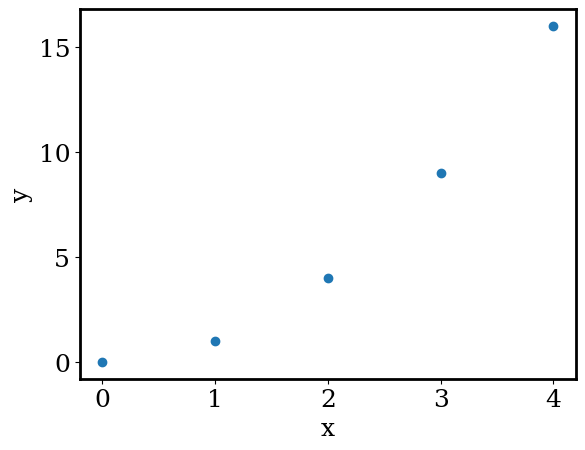

In [4]:
# here's the x values we will loop over
x = [0,1,2,3,4]

# here's where we will store the y values
y = []

# here's the for loop
for xi in x:
  y.append(xi**2)

# let plot x vs y
plt.scatter(x,y)

# let's be good and label our plot
plt.xlabel('x')
plt.ylabel('y')

**Part a**

Using a for loop, make a plot of $y = 2 * x + 1$ for $x$ between $0$ and $10$.

Use `x = np.linspace(0, 10, 5)` which will create an array of 10 evenly spaced values bewteen 0 and 10.

In [ ]:
# your answer here

**Part b**

Use your `objective_function` to search for good values of `m,b`. Using `for` loops, calculate `objective_function` for $0<m<20$ and $-1000<b<0$. For each combination of `b,m` plot `b` vs. `m` on a scatter plot with the color set by `objective_function(x,y,m,b)`. For an example of a scatter plot with the points colored by a third parameter, see the [`Getting started with arrays and plots in Python notebook`](https://jgreene100.github.io/Ast207/docs/intro_python/numpy_and_plotting.html). Try 50 values of `b` and 50 values of `m` (it should run in less than a second). For ease of reading, plot `np.log10` of the objective function.

In [ ]:
# your answer here

**Exercise 5**

From your grid search above, find the values of `m,b` that yield the lowest `simple_objective_function`. Plot the linear function using these parameters alongside the football data and your by-band linear function. Be sure to label your plot.

Hint: try using `np.argmin`

In [ ]:
# Your answer here